In [339]:
from audio.analyze_audio import analyze_audio_file
from video.analyze_video import fer_video, fer_image, extract_frames
from lexical.lexical_analysis import calc_score

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import os

torch.__version__

'2.1.2+cu121'

In [340]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [341]:
lexlabels = list(calc_score("../test/P1/transcript.txt").keys())
lexlabels

['neg', 'neu', 'pos', 'compound']

In [342]:
audlabels = list(analyze_audio_file("../test/P1/P1_0.wav").keys())
audlabels

['number_of_syllables',
 'number_of_pauses',
 'rate_of_speech',
 'articulation_rate',
 'speaking_duration',
 'original_duration',
 'balance',
 'f0_mean',
 'f0_std',
 'f0_median',
 'f0_min',
 'f0_max',
 'f0_quantile25',
 'f0_quan75']

In [343]:
vidlabels = list(fer_video("../test/P1/P1_0.avi").keys())

2024-01-21 04:43:56.474942: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-21 04:43:56.481382: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-21 04:43:56.481541: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [344]:
labels = pd.read_csv("/home/vamsi/Projects/datasets/MIT_INTERVIEW_DATASET_2/Labels/turker_scores_full_interview.csv")
labels

,Participant,Worker,Overall,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,...,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
0,p1,A1ITBXITLY2952,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,6.000000,93.000000
1,p1,A1OLRUT93TXWEP,6.000000,6.000000,7.000000,5.000000,4.000000,6.000000,5.000000,5.000000,...,5.000000,7.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,99.000000
2,p1,A1ZQ7A1CUV6RD8,6.000000,6.000000,3.000000,7.000000,6.000000,7.000000,4.000000,3.500000,...,4.000000,6.000000,6.000000,3.000000,7.000000,7.000000,6.000000,7.000000,6.000000,97.500000
3,p1,A2F7D8EOTB663,6.000000,5.000000,6.000000,7.000000,5.000000,7.000000,4.000000,5.000000,...,5.000000,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000,6.000000,5.000000,105.000000
4,p1,A323WW03VM8089,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.250000,...,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,71.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,pp89,A323WW03VM8089,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,5.250000,...,6.000000,4.000000,6.000000,3.000000,5.000000,4.000000,5.000000,7.000000,4.000000,89.250000
1374,pp89,ABM77ZQWCHPNX,5.000000,5.000000,5.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,6.000000,6.000000,6.000000,5.000000,7.000000,7.000000,5.000000,6.000000,7.000000,98.000000
1375,pp89,ANUXUJE8QRE0C,5.000000,5.000000,6.000000,7.000000,6.000000,2.000000,7.000000,5.250000,...,7.000000,6.000000,5.000000,6.000000,6.000000,6.000000,5.000000,7.000000,7.000000,102.250000
1376,pp89,ARX0S1CIDJLOX,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,...,6.000000,6.000000,3.000000,1.000000,6.000000,6.000000,2.000000,6.000000,5.000000,62.000000


In [345]:
def get_label(participant):
    return labels[labels['Participant'] == participant].iloc[-1]['RecommendHiring']

In [346]:
VIDEO_ROOT = "/home/vamsi/Projects/bmxi-test/test"

In [347]:
from tqdm import tqdm

def prepare_data():
    df = pd.DataFrame(columns=["Video", "Label"] + vidlabels + audlabels + lexlabels)

    participants = os.listdir(VIDEO_ROOT)
    allvideos = []
    labels = []
    
    # iterate over all participants
    for i in tqdm(range(len(participants))):
        participant = participants[i]
        label = get_label(participant.lower())
        lexical_output = calc_score(os.path.join(VIDEO_ROOT, participant, "transcript.txt"))
        
        # iterate over sub videos
        for i in range(5):
            p = f"{participant}_{i}"
            
            facial_output = fer_video(os.path.join(VIDEO_ROOT, participant, f"{p}.avi"))
            audio_output = analyze_audio_file(os.path.join(VIDEO_ROOT, participant, f"{p}.wav"))
            
            try:
                vidoutput = torch.tensor(list(facial_output.values()) + list(audio_output.values()) + list(lexical_output.values()))
                laboutput = torch.tensor([label])
            except:
                print(f"Error in {p}")
                continue
            
            allvideos.append(vidoutput)
            labels.append(laboutput)
            
    allvideos = torch.stack(allvideos)
    labels = torch.stack(labels)
    
    return allvideos, labels

In [348]:
data, labels = prepare_data()

  9%|▉         | 4/45 [01:03<12:20, 18.06s/it]

Error in P6_1


 16%|█▌        | 7/45 [01:59<10:56, 17.27s/it]

Error in P17_4


 22%|██▏       | 10/45 [02:41<08:30, 14.58s/it]

Error in PP5_4


 27%|██▋       | 12/45 [03:04<07:11, 13.06s/it]

Error in PP7_0


 33%|███▎      | 15/45 [03:40<06:16, 12.54s/it]

Error in P30_0
Error in P30_1
Error in P30_2


 47%|████▋     | 21/45 [05:21<07:10, 17.95s/it][mpeg4 @ 0x3ba29040] illegal dc vlc
[mpeg4 @ 0x3ba29040] Error at MB: 21
[mpeg4 @ 0x3ba29040] illegal mb_num in video packet (1288 1200) 
[mpeg4 @ 0x3ba29040] illegal mb_num in video packet (1288 1200) 
 49%|████▉     | 22/45 [05:33<06:08, 16.02s/it]

Error in P29_0


 67%|██████▋   | 30/45 [07:48<04:15, 17.01s/it]

Error in P13_4


 71%|███████   | 32/45 [08:27<03:59, 18.44s/it]

Error in PP6_0
Error in PP6_2
Error in PP6_3


 73%|███████▎  | 33/45 [08:58<04:27, 22.27s/it]

Error in PP6_4
Error in PP13_0
Error in PP13_1
Error in PP13_2
Error in PP13_3


 76%|███████▌  | 34/45 [09:13<03:38, 19.89s/it]

Error in PP13_4


 91%|█████████ | 41/45 [11:10<01:11, 17.84s/it]

Error in P5_0


100%|██████████| 45/45 [12:32<00:00, 16.71s/it]


In [350]:
torch.save(data, "data.pt")
torch.save(labels, "labels.pt")

In [43]:
# load data
data = torch.load("data.pt")
labels = torch.load("labels.pt")

In [351]:
data.shape, labels.shape

(torch.Size([206, 25]), torch.Size([206, 1]))

In [352]:
data = nn.functional.normalize(data, p=2, dim=1)

In [353]:
class DaModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.model = nn.Sequential(
            nn.Linear(25, 1024),
            nn.ReLU(),
            nn.Linear(1024, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        # return self.model(nn.functional.normalize(x, dim=-2))
        return self.model(x)

In [357]:
model0 = DaModel().to(device)
model0

DaModel(
  (model): Sequential(
    (0): Linear(in_features=25, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [358]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model0.parameters(), lr=0.00001)

In [359]:
from sklearn.model_selection import train_test_split

data = data.to(torch.float32)
labels = labels.to(torch.float32)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([164, 25]),
 torch.Size([164, 1]),
 torch.Size([42, 25]),
 torch.Size([42, 1]))

In [360]:
# move to device

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [361]:
# from tqdm import tqdm

# EPOCHS = 10000

# train_losses = []
# test_losses = []

# for epoch in tqdm(range(EPOCHS)):
#     model0.train()
    
#     y_pred = model0(X_train)
#     loss = loss_fn(y_pred, y_train)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     train_losses.append(loss.item())
    
#     model0.eval()
#     with torch.inference_mode():
#         test_pred = model0(X_test)
        
#         test_loss = loss_fn(test_pred, y_test)
        
#         test_losses.append(test_loss.item())

In [362]:
# from tqdm import tqdm

# EPOCHS = 40

# train_losses = []
# test_losses = []

# for epoch in tqdm(range(EPOCHS)):
#     model0.train()
    
#     epoch_train_losses = []
    
#     for i in range(len(X_train)):
#         y_pred = model0(X_train[i])
#         loss = loss_fn(y_pred, y_train[i])
        
#         epoch_train_losses.append(loss.item())
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#     train_losses.append(sum(epoch_train_losses) / len(epoch_train_losses))
    
#     model0.eval()
#     with torch.inference_mode():
#         test_pred = model0(X_test)
        
#         test_loss = loss_fn(test_pred, y_test)
        
#         test_losses.append(test_loss.item())

In [363]:
from tqdm import tqdm

data = data.to(torch.float32).to(device)
labels = labels.to(torch.float32).to(device)

EPOCHS = 40

train_losses = []
test_losses = []

for epoch in tqdm(range(EPOCHS)):
    model0.train()
    
    epoch_train_losses = []
    
    for i in range(len(data)):
        y_pred = model0(data[i])
        loss = loss_fn(y_pred, labels[i])
        
        epoch_train_losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(sum(epoch_train_losses) / len(epoch_train_losses))

100%|██████████| 40/40 [00:09<00:00,  4.40it/s]


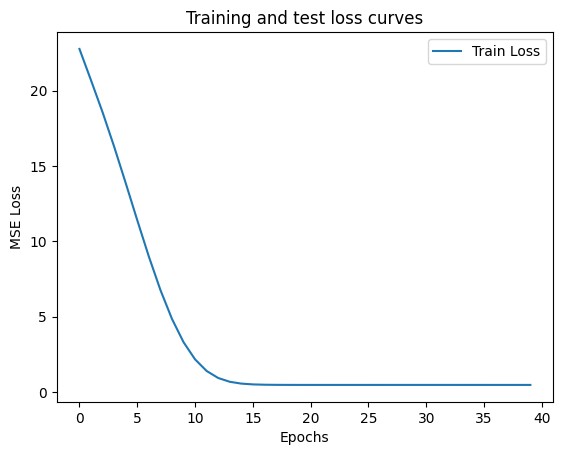

In [364]:
plt.plot(range(EPOCHS), train_losses, label="Train Loss")
# plt.plot(range(EPOCHS), test_losses, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("MSE Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [366]:
train_losses[-1]

0.4783217347978138

In [ ]:
# save model state dict
torch.save(model0.state_dict(), "model.pt")